In [1]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
from pathlib import Path

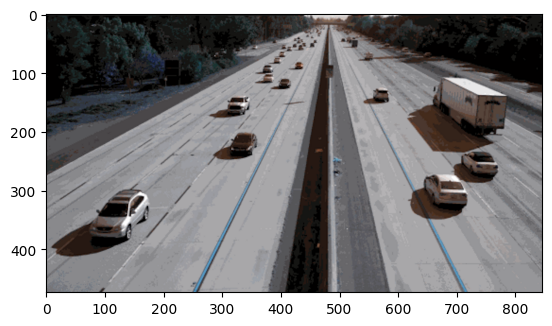

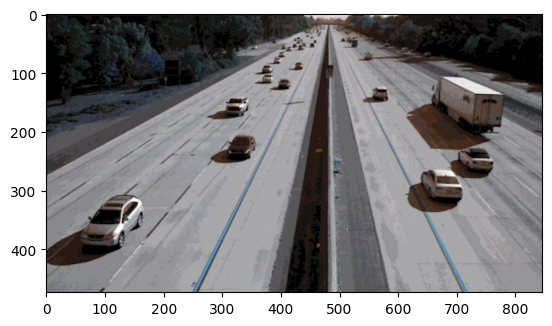

In [2]:
autoroute1 = cv2.imread("images/autoroute1.png")
autoroute1 = cv2.cvtColor(autoroute1, cv2.COLOR_BGR2RGB)
autoroute2 = cv2.imread("images/autoroute2.png")
autoroute2 = cv2.cvtColor(autoroute2, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(autoroute1)
plt.show
plt.figure()
plt.imshow(autoroute2)
plt.show()

In [3]:
autoroute2.shape

(474, 846, 3)

## - Implementation l'estimation du flot optique par la méthode de Lucas-Kanade : l'estimation se fera uniquement en certains points de l'image, obtenus grâce à la fonction cv.goodFeaturesToTrack

In [4]:

def estimate_motion(img1, img2, point):
   

    p= point
    neighboor_coords = [(p[0] + i, p[1] + j) for i in [-1, 0, 1] for j in [-1, 0, 1] if i*j + i+j != 0]
    neighboor_coords = [neighboor_coord for neighboor_coord in neighboor_coords if 0 <= neighboor_coord[0] < img1.shape[0] and 0 <= neighboor_coord[1] < img1.shape[1]]
    sobelx = cv2.Sobel(img1,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(img1,cv2.CV_64F,0,1,ksize=5)
    #print("shape sobel", sobelx.shape)

    It = img2-img1
    
    Ix = np.array([sobelx[neighboor_coord] for neighboor_coord in neighboor_coords])
    Iy = np.array([ sobely[neighboor_coord] for neighboor_coord in neighboor_coords])
    It = np.array([(img1-img2)[neighboor_coord] for neighboor_coord in neighboor_coords])

    I = np.array([Ix, Iy]).T

    v = np.linalg.lstsq(I, -1*It, rcond=None)[0]
    # print("shape Ix", Ix.shape)
    # print("shape It", It.shape)
    # print("shape I", I.shape)
    # print("v shape", v.shape)
    # selected_p_1 = np.array([img1[p[0], p[1]]  for p in point])
    # selected_p_2 = np.array([img2[p[0], p[1]]  for p in point])
    return v


img1 = cv2.cvtColor(autoroute1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(autoroute2, cv2.COLOR_RGB2GRAY)

features = cv2.goodFeaturesToTrack(img1, maxCorners=100, qualityLevel=0.3, minDistance=7)

features = features.reshape((features.shape[0], features.shape[2]))
features = features.astype(int)
vector = np.array([ estimate_motion(img1, img2, tuple(feature)) for feature in features])


vector.shape

(52, 2)

In [5]:
motion = [(feature[0], feature[1], estimate_motion(img1, img2, tuple(feature))) for feature in features]
motion

[(143, 344, array([-0.04524329,  0.00818732])),
 (166, 311, array([-0.0400904,  0.1445865])),
 (173, 327, array([-0.08234096, -0.0064971 ])),
 (343, 149, array([ 0.02173567, -0.00620859])),
 (335, 149, array([-0.04709472, -0.0145549 ])),
 (711, 298, array([0., 0.])),
 (142, 369, array([ 2.19320178, -1.71645497])),
 (383, 89, array([-32.78361669,  -0.17156105])),
 (343, 142, array([ 0.02101656, -0.01270703])),
 (170, 350, array([-0.0095601 ,  0.05638922])),
 (430, 41, array([-0.01295728,  0.63443811])),
 (764, 251, array([0., 0.])),
 (287, 71, array([ 0.10186824, -0.21342842])),
 (316, 214, array([0., 0.])),
 (151, 335, array([-0.03605232, -0.00265138])),
 (337, 170, array([-0.07165419, -0.03464059])),
 (144, 358, array([-0.22544205,  0.52961914])),
 (461, 48, array([0., 0.])),
 (343, 162, array([ 0.13789965, -0.05814749])),
 (456, 54, array([0.89231619, 0.04995089])),
 (436, 91, array([0., 0.])),
 (350, 239, array([0.04668237, 1.0058273 ])),
 (408, 58, array([-0.04859352,  0.0209863 ])

In [6]:
features = cv2.goodFeaturesToTrack(img1, maxCorners=100, qualityLevel=0.3, minDistance=7)
features =  features.reshape((features.shape[0], features.shape[2]))
features = features.astype(int)
estimate_motion(img1, img2, features[0])

array([-0.04524329,  0.00818732])

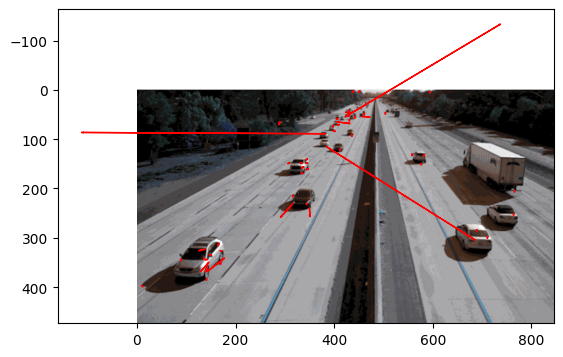

In [7]:
plt.imshow(autoroute1)
for v in motion:
    plt.arrow(v[0],v[1],15*v[2][0],15*v[2][1], head_width = 2, head_length = 4, color = "r")

plt.show()

In [18]:
(np.abs(flow) > 6).sum()

62977

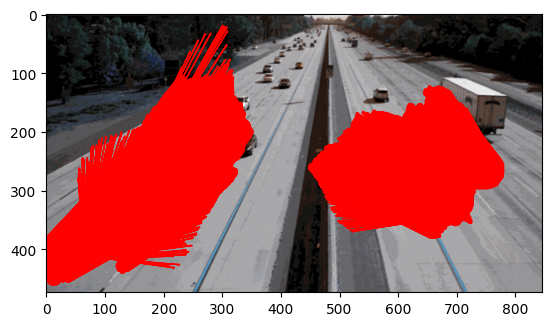

In [22]:
flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)


u = flow[:, :, 0]
v = flow[:, :, 1]
t = 7
plt.imshow(autoroute1)
S = np.shape(img1)
for i in range(S[0]):
    for j in range(S[1]):
        if abs(u[i,j])>t or abs(v[i,j])>t:
            plt.arrow(j,i,15*v[i,j],15*u[i,j], head_width = 2, head_length = 4, color = "r")

plt.show()

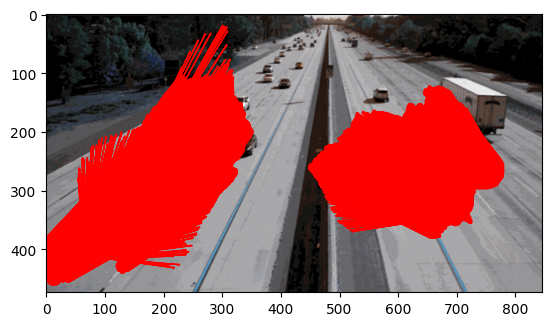

In [23]:
features = cv2.goodFeaturesToTrack(img1, maxCorners=100, qualityLevel=0.3, minDistance=7)
flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)


u = flow[:, :, 0]
v = flow[:, :, 1]
t = 7
plt.imshow(autoroute1)
S = np.shape(img1)
for i in range(S[0]):
    for j in range(S[1]):
        if abs(u[i,j])>t or abs(v[i,j])>t:
            plt.arrow(j,i,15*v[i,j],15*u[i,j], head_width = 2, head_length = 4, color = "r")

plt.show()